# Working with Data - Computer Lab for Guest Lecture Julia Lane

In this computer lab we will learn more more details and practice data work to enhance the content of the lecture presented by Julia Lane on responsible data use. We will address a research question, think about data and measurement errors, and manipulate data. 

OUTLINE: 
1. Define a research question 
2. Think about what data are available 
3. Think about possible measurement errors 
4. Think about the interpretation of your results 
5. Inform your results by linking datasets 

# 1. Define a reserach question
Which Community Districts in NYC show the highest number of complaints?

# 2. Think about what data are available
Find suitable data by searching the CUSP Data Catalog https://datahub.cusp.nyu.edu/catalog. You can use Urban Profiler to investigate the Metadata associated with each dataset. Using this tool will help you to decide which attributes of the data you need to answer your question so you don't have to load the entire dataset. 

In [523]:
import os
import pandas as pd
import numpy as np
import re
import seaborn
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm


    
%matplotlib inline
PUIdata = os.getenv('PUIDATA')

In [100]:
PUIdata

'/home/cusp/pf910/PUIdata'

In [101]:
data = pd.read_csv('/projects/open/NYCOpenData/nycopendata/data/erm2-nwe9/1446832678/erm2-nwe9')

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,17,39,40,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [102]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31911011,11/05/2015 02:59:15 AM,NaN,DOT,Department of Transportation,Street Condition,Pothole,NaN,11224,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.573431,-73.991742,"(40.57343122248129, -73.99174247588253)"
1,31908754,11/05/2015 02:09:49 AM,NaN,CHALL,CHALL,Opinion for the Mayor,HOUSING,NaN,NaN,NaN,...,NaN,NaN,NaN,1-1-1173130914,NaN,NaN,NaN,NaN,NaN,NaN
2,31910423,11/05/2015 02:06:51 AM,NaN,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11234,1157 EAST 57 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.625004,-73.920726,"(40.62500363580505, -73.92072558378698)"
3,31909924,11/05/2015 02:02:20 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11218,722 EAST 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634522,-73.974790,"(40.634522428879706, -73.97479041437481)"
4,31913310,11/05/2015 01:57:20 AM,11/05/2015 01:57:31 AM,HRA,HRA Benefit Card Replacement,Benefit Card Replacement,Medicaid,NYC Street Address,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
data.shape

(10187766, 53)

In [104]:
data.columns

Index([u'Unique Key', u'Created Date', u'Closed Date', u'Agency',
       u'Agency Name', u'Complaint Type', u'Descriptor', u'Location Type',
       u'Incident Zip', u'Incident Address', u'Street Name', u'Cross Street 1',
       u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2',
       u'Address Type', u'City', u'Landmark', u'Facility Type', u'Status',
       u'Due Date', u'Resolution Description',
       u'Resolution Action Updated Date', u'Community Board', u'Borough',
       u'X Coordinate (State Plane)', u'Y Coordinate (State Plane)',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp',

In [105]:
data.drop_duplicates(subset = "Unique Key" , keep='last')

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31911011,11/05/2015 02:59:15 AM,NaN,DOT,Department of Transportation,Street Condition,Pothole,NaN,11224,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.573431,-73.991742,"(40.57343122248129, -73.99174247588253)"
1,31908754,11/05/2015 02:09:49 AM,NaN,CHALL,CHALL,Opinion for the Mayor,HOUSING,NaN,NaN,NaN,...,NaN,NaN,NaN,1-1-1173130914,NaN,NaN,NaN,NaN,NaN,NaN
2,31910423,11/05/2015 02:06:51 AM,NaN,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11234,1157 EAST 57 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.625004,-73.920726,"(40.62500363580505, -73.92072558378698)"
3,31909924,11/05/2015 02:02:20 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11218,722 EAST 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634522,-73.974790,"(40.634522428879706, -73.97479041437481)"
4,31913310,11/05/2015 01:57:20 AM,11/05/2015 01:57:31 AM,HRA,HRA Benefit Card Replacement,Benefit Card Replacement,Medicaid,NYC Street Address,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,31914148,11/05/2015 01:55:55 AM,NaN,DOT,Department of Transportation,Highway Condition,Pothole - Highway,Highway,10304,NaN,...,Staten Island Expwy,East/Brooklyn Bound,Roadway,Clove Rd/Richmond Rd (Exit 13) - Lily Pond Ave...,NaN,NaN,NaN,40.606875,-74.085408,"(40.60687536641399, -74.0854077221027)"
6,31912764,11/05/2015 01:55:37 AM,NaN,DPR,DPR,Agency Issues,New Tree Complaint,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,31912611,11/05/2015 01:47:12 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10021,1402 2 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.769379,-73.957930,"(40.769378795761845, -73.95793023233308)"
8,31913909,11/05/2015 01:39:31 AM,11/05/2015 02:35:44 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11231,273 SMITH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.682614,-73.993240,"(40.682613541568664, -73.99323966551619)"
9,31914856,11/05/2015 01:38:35 AM,11/05/2015 02:33:33 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11231,273 SMITH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.682614,-73.993240,"(40.682613541568664, -73.99323966551619)"


In [106]:
data1= pd.DataFrame()

In [107]:
data1['Agency Name'] = data['Agency Name']

In [108]:
data1['Complaint Type'] = data['Complaint Type'] 
data1['Community Board'] = data['Community Board'] 
data1['Descriptor'] = data['Descriptor'] 
data1['Borough'] = data['Borough']
data1['Location'] = data['Location'] 
data1['Unique Key'] = data['Unique Key'] 

data1.head()



,Agency Name,Complaint Type,Community Board,Descriptor,Borough,Location,Unique Key
0,Department of Transportation,Street Condition,13 BROOKLYN,Pothole,BROOKLYN,"(40.57343122248129, -73.99174247588253)",31911011
1,CHALL,Opinion for the Mayor,0 Unspecified,HOUSING,Unspecified,NaN,31908754
2,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,18 BROOKLYN,Trees and Sidewalks Program,BROOKLYN,"(40.62500363580505, -73.92072558378698)",31910423
3,New York City Police Department,Illegal Parking,12 BROOKLYN,Blocked Hydrant,BROOKLYN,"(40.634522428879706, -73.97479041437481)",31909924
4,HRA Benefit Card Replacement,Benefit Card Replacement,0 Unspecified,Medicaid,Unspecified,NaN,31913310


# 3. Think about possible measurement errors
Do you see any problems regarding possible measurement error? Think about who is represented in the data, ommissions, duplications, content error, missing data, etc. 

In [109]:
invaliddistricts = ['Unspecified MANHATTAN', 'Unspecified BROOKLYN', 'Unspecified BRONX', 
            'Unspecified QUEENS', 'Unspecified STATEN ISLAND', '0 Unspecified', 
            '84 QUEENS','83 QUEENS', '80 QUEENS', '82 QUEENS', '81 QUEENS', '95 STATEN ISLAND', 
            '64 MANHATTAN', '26 BRONX', '27 BRONX','28 BRONX', '55 BROOKLYN', '56 BROOKLYN']

In [110]:
data1 = data1[~data['Community Board'].isin(invaliddistricts)]
len(data1['Community Board'].unique())

59

In [111]:
data2 = data1.drop_duplicates(subset = "Unique Key" , keep='last')


In [112]:
data2.isnull().sum()

Agency Name            0
Complaint Type         0
Community Board        0
Descriptor         30545
Borough                0
Location           85468
Unique Key             0
dtype: int64

In [113]:
data2['Descriptor'].fillna(data2["Complaint Type"], inplace=True)
data2.isnull().sum()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Agency Name            0
Complaint Type         0
Community Board        0
Descriptor             0
Borough                0
Location           85468
Unique Key             0
dtype: int64

In [114]:
data2

,Agency Name,Complaint Type,Community Board,Descriptor,Borough,Location,Unique Key
0,Department of Transportation,Street Condition,13 BROOKLYN,Pothole,BROOKLYN,"(40.57343122248129, -73.99174247588253)",31911011
2,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,18 BROOKLYN,Trees and Sidewalks Program,BROOKLYN,"(40.62500363580505, -73.92072558378698)",31910423
3,New York City Police Department,Illegal Parking,12 BROOKLYN,Blocked Hydrant,BROOKLYN,"(40.634522428879706, -73.97479041437481)",31909924
5,Department of Transportation,Highway Condition,02 STATEN ISLAND,Pothole - Highway,STATEN ISLAND,"(40.60687536641399, -74.0854077221027)",31914148
7,New York City Police Department,Noise - Commercial,08 MANHATTAN,Loud Music/Party,MANHATTAN,"(40.769378795761845, -73.95793023233308)",31912611
8,New York City Police Department,Noise - Commercial,06 BROOKLYN,Loud Music/Party,BROOKLYN,"(40.682613541568664, -73.99323966551619)",31913909
9,New York City Police Department,Noise - Commercial,06 BROOKLYN,Loud Music/Party,BROOKLYN,"(40.682613541568664, -73.99323966551619)",31914856
10,New York City Police Department,Blocked Driveway,10 BRONX,No Access,BRONX,"(40.820622268305286, -73.81001443391547)",31911308
11,Taxi and Limousine Commission,Taxi Complaint,06 MANHATTAN,Driver Complaint,MANHATTAN,"(40.75692417775419, -73.96997589542615)",31909392
12,New York City Police Department,Blocked Driveway,04 BROOKLYN,No Access,BROOKLYN,"(40.69636767790248, -73.92873677664315)",31912284


In [115]:
data55 = pd.DataFrame()
data55['freq'] = pd.value_counts(data2[['Community Board']].values.ravel()) 
data55['Community Board'] = data55.index
data55.head()
data55.reset_index(inplace = True)
del data55['index']
#data55['index'].drop()
data55.head()

,freq,Community Board
0,268053,12 MANHATTAN
1,229383,12 QUEENS
2,197305,03 BROOKLYN
3,195961,07 QUEENS
4,191720,17 BROOKLYN


In [135]:
cd_id = {'BRONX': 'BX', 'BROOKLYN': 
         'BK', 'MANHATTAN': 'MN', 'QUEENS': 'QN', 'STATEN ISLAND': 'SI'}


data55['cd_num'] = data55['Community Board'].str[:2]
data55['cd_name'] = data55['Community Board'].str[3:]


data55.replace({'cd_name': cd_id}, inplace=True)
data55['cd_id'] = data55['cd_name'] + data55['cd_num']

df_311 = data55[['cd_id', 'freq']]
df_311.head()

,cd_id,freq
0,MN12,268053
1,QN12,229383
2,BK03,197305
3,QN07,195961
4,BK17,191720


In [137]:
df_311['cd_id'].unique()

array(['MN12', 'QN12', 'BK03', 'QN07', 'BK17', 'BK05', 'BK14', 'BX07',
       'BK01', 'SI01', 'BX04', 'QN01', 'QN05', 'BX12', 'QN13', 'BX05',
       'BK18', 'MN07', 'QN09', 'BK12', 'MN03', 'MN08', 'BX09', 'BK15',
       'MN05', 'BK08', 'BK11', 'BK04', 'MN10', 'SI03', 'BK09', 'MN02',
       'MN04', 'QN10', 'MN09', 'QN08', 'BX11', 'QN03', 'SI02', 'BK02',
       'QN02', 'BK06', 'BK10', 'BK07', 'MN06', 'QN14', 'QN11', 'BX06',
       'QN04', 'BX10', 'MN11', 'BX08', 'QN06', 'BK16', 'MN01', 'BX03',
       'BX01', 'BK13', 'BX02'], dtype=object)

In [138]:
len(df_311['cd_id'].unique())# How many unique values do we have? 

59

In [44]:
# Why do we have so many? Some of them are unspecified, missing. Some might be invalid entries. 
# We should have 59 Community Districts.

In [45]:
# Check for duplicates? Are these plausible?

In [46]:
# What about missing values? Can you detect any patterns? 

In [47]:
# Data Editing: Is it possible to replace missing values? Is it possible to use Complaint Type 
# to fill missings in Resolution Descriptor?

In [48]:
# Generate marker for unplausible Community Districts
# How do these districts look like? 

In [49]:
# Drop the marked districts

In [50]:
# Produce your result: Generate an indicator which ranks the Community District by complaint numbers 
# on the Community district level

In [51]:
# Safe reduced data frame (Community District level)

# 4. Think about the interpretation of your results?
What do you have to keep in mind when interpreting your results? Are they generable? Does the way the data is collected influence your results? To better inform city agancies it might be good to explore in more detail the underlying dempgraphics/infrastructure of a Community District becasue this might influence 311 calls. You can do this by merging external data on the Community District level to your analysis data. 

In [524]:
os.system("curl -O http://cosmo.nyu.edu/~fb55/PUI2016/data/Final_Demographics.csv" )
os.system("mv " + "Final_Demographics.csv " + os.getenv("PUIDATA"))

0

In [525]:
# Population by Community District
df_pop = pd.read_csv(PUIdata + "/Final_Demographics.csv")

In [526]:
df_pop.columns

Index([u'FIPS', u'cd_id', u'Total Population',
       u'Population Density (per sq. mile)', u'% Total Population: Male',
       u'% Total Population: 18 to 24 Years',
       u'% Total Population: 25 to 34 Years',
       u'% Total Population: 35 to 44 Years',
       u'% Population 5 Years And Over: Speak Only English',
       u'% Population 5 Years And Over: Spanish or Spanish Creole',
       ...
       u'Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Production occupations',
       u'Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Transportation and material moving occupations',
       u'% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations',
       u'% Employed Civilian Population 16 Years And Over: Service occupations',
       u'% Employed Civilian Population 16 Years And Over: Sales and office occupations',
       

In [335]:
# Check variables in file
len(df_pop['cd_id'])

59

In [336]:
data4 = df_pop['cd_id'].unique()

In [337]:
len(data4)

59

In [338]:
# How many community districts are in file? 

In [339]:
# Manipulate data to get some information on demographics by Community District. 
# Think about who might be more likely to call 311

In [483]:
df_pop_sub["cd_id"] = df_pop["cd_id"]
df_pop_sub['prcnt_employed'] = df_pop['Employed Civilian Population 16 Years And Over:.1'] / df_pop['Total Population']
df_pop_sub['millenial']=((df_pop["% Total Population: 18 to 24 Years"] + df_pop["% Total Population: 25 to 34 Years"])\
*df_pop['Total Population'])/100
df_pop_sub.head()

,cd_id,Total Population,prcnt_employed,millenial
0,BX08,106737,0.444391,27506.1249
1,BX12,134644,0.441386,34522.7216
2,BX10,121209,0.441279,27102.3324
3,BX11,135839,0.447331,34679.6967
4,BX03,172247,0.349074,50175.5511


In [527]:

os.system("curl -O http://cosmo.nyu.edu/~fb55/PUI2016/data/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv" )
os.system("mv " + "ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv " + os.getenv("PUIDATA"))

0

In [485]:
# Infrastructure by Community District
df_infr = pd.read_csv(PUIdata + "/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")

In [486]:
# Check variables in file
df_infr.head()

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,2168,2119,8121,75.64,42035,35048,404,30943,3701,6987
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,928,1891,10696,71.92,44830,36700,178,31435,5087,8130
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,639,2882,11439,69.56,47050,38700,158,32333,6209,8350
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,1001,2722,10197,71.24,44922,37237,122,31278,5837,7685
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,1385,3312,18741,61.68,57556,42576,88,33408,9080,14980


In [487]:
data5 = df_infr['Qualifying Name'].unique()
# How many community districts are in file? 
len(data5)

55

In [488]:
df_infr.duplicated()

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
11     True
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20    False
21    False
22    False
23     True
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
dtype: bool

In [489]:
df_infr['Qualifying Name'].drop_duplicates()
df_infr.shape

(59, 31)

In [490]:
df_infr.columns
df_infr.drop_duplicates()

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,2168,2119,8121,75.64,42035,35048,404,30943,3701,6987
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,928,1891,10696,71.92,44830,36700,178,31435,5087,8130
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,639,2882,11439,69.56,47050,38700,158,32333,6209,8350
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,1001,2722,10197,71.24,44922,37237,122,31278,5837,7685
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,1385,3312,18741,61.68,57556,42576,88,33408,9080,14980
6,3603706,79500US3603706,"NYC-Bronx Community District 7--Bedford Park, ...",47252,31468,0,1598,502,1096,18280,...,1624,4655,11129,66.60,47252,38899,0,31021,7878,8353
7,3603707,79500US3603707,NYC-Bronx Community District 5--Morris Heights...,44699,26332,54,956,352,604,11333,...,1062,2980,15387,58.91,44699,34397,54,25772,8571,10302
8,3603708,79500US3603708,"NYC-Bronx Community District 4--Concourse, New...",47935,29376,316,301,73,228,14610,...,2374,3701,14858,61.28,47935,34692,316,27971,6405,13243
9,3603709,79500US3603709,"NYC-Bronx Community District 9--Castle Hill, N...",64011,45976,180,1536,296,1240,23999,...,1663,1871,16164,71.83,64011,53072,180,45261,7631,10939
10,3603710,79500US3603710,NYC-Bronx Community District 1 & 2--Hunts Poin...,52191,32713,0,982,360,622,17281,...,1002,2412,17066,62.68,52191,39141,0,30958,8183,13050


In [491]:
data7 = df_infr['Qualifying Name'].unique()
df_infr_sub = df_infr[["FIPS", "Geographic Identifier", "Qualifying Name", "Households", "Households: With An Internet Subscription",\
                        "Households: No Internet Access", "Households: Has A Computer", "Households: Without An Internet Subscription",\
                        "Households: With Dial-Up Internet Subscription Alone", "Households: With A Broadband Internet Subscription"]]
#data6 = df_infr_unique.groupby('Qualifying Name')['Households'].sum()
#data8 = df_infr_unique.groupby('Qualifying Name')['Households'].sum()
#len(data6)

len(data7)

55

In [492]:
df_infr_sub['low_connect'] = df_infr_sub['Households: With Dial-Up Internet Subscription Alone']\
+ df_infr_sub['Households: Without An Internet Subscription']
df_infr_sub['Hi_connect'] = df_infr_sub['Households: With A Broadband Internet Subscription']
df_infr_final = df_infr_sub[["Qualifying Name", "Households", "low_connect", "Hi_connect"]]
df_infr_final.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Qualifying Name,Households,low_connect,Hi_connect
0,"NYC-Bronx Community District 8--Riverdale, New...",42035,4105,30943
1,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,5265,31435
2,"NYC-Bronx Community District 10--Co-op City, N...",47050,6367,32333
3,NYC-Bronx Community District 11--Pelham Parkwa...,44922,5959,31278
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,9168,33408


In [493]:
# Manipulate data to get some information on internet/broadband useage by Community District
# Aggregate the mobile subscription data
df_infr_final['Mobile_yes'] = df_infr['Households: With Mobile Broadband'] + \
                    df_infr['Households: With Mobile Broadband.1'] + \
                    df_infr['Households: With Mobile Broadband.2'] + \
                    df_infr['Households: With Mobile Broadband.3'] + \
                    df_infr['Households: With Mobile Broadband.4'] + \
                    df_infr['Households: Mobile Broadband Alone or With Dialup']
df_infr_final['Mobile_no'] = df_infr['Households: Without Mobile Broadband'] + \
                    df_infr['Households: Without Mobile Broadband.1'] + \
                    df_infr['Households: Without Mobile Broadband.2'] + \
                    df_infr['Households: Without Mobile Broadband.3'] + \
                    df_infr['Households: Without Mobile Broadband.4'] + \
                    df_infr['Households: Without An Internet Subscription'] + \
                    df_infr['Households: No Internet Access'] + \
                    df_infr['Households: Dial-Up Alone']
df_infr_final['Hi_connect']

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0      30943
1      31435
2      32333
3      31278
4      33408
5      33408
6      31021
7      25772
8      27971
9      45261
10     30958
11     30958
12     56092
13     34729
14     35908
15     29632
16    102849
17     85468
18     69776
19     69776
20     69676
21     45434
22     74339
23     74339
24     48956
25     34435
26     46362
27     46148
28     32845
29     32660
30     45378
31     44121
32     34367
33     24376
34     36743
35     53561
36     34990
37     28023
38     35429
39     37282
40     27609
41     43975
42     39783
43     45438
44     27559
45     60733
46     40114
47     67680
48     37199
49     49266
50     43232
51     33180
52     41070
53     43902
54     47925
55     35511
56     53106
57     29698
58     27803
Name: Hi_connect, dtype: int64

In [494]:
data444 = df_infr_final['Qualifying Name'].unique()
data444

array(['NYC-Bronx Community District 8--Riverdale, New York',
       'NYC-Bronx Community District 12--Wakefield, New York',
       'NYC-Bronx Community District 10--Co-op City, New York',
       'NYC-Bronx Community District 11--Pelham Parkway, New York',
       'NYC-Bronx Community District 3 & 6--Belmont, New York',
       'NYC-Bronx Community District 7--Bedford Park, New York',
       'NYC-Bronx Community District 5--Morris Heights, New York',
       'NYC-Bronx Community District 4--Concourse, New York',
       'NYC-Bronx Community District 9--Castle Hill, New York',
       'NYC-Bronx Community District 1 & 2--Hunts Point, New York',
       'NYC-Manhattan Community District 12--Washington Heights, New York',
       'NYC-Manhattan Community District 9--Hamilton Heights, New York',
       'NYC-Manhattan Community District 10--Central Harlem PUMA, New York',
       'NYC-Manhattan Community District 11--East Harlem PUMA, New York',
       'NYC-Manhattan Community District 8--Upper Eas

In [495]:
df_infr_final['cd_borough'] = df_infr_final['Qualifying Name'].str.extract('(?<=^....)([a-zA-Z]+)',
                                                                      expand=True)
df_infr_final['cd_num'] = df_infr_final['Qualifying Name'].str.extract('([0-9]+)',
                                                                                expand=True)


cd_id1 = {'Bronx': 'BX', 'Brooklyn': 
         'BK', 'Manhattan': 'MN', 'Queens': 'QN', 'Staten': 'SI'}
df_infr_final.replace({'cd_borough': cd_id1}, inplace=True)
df_infr_final['cd_id'] = df_infr_final['cd_borough'] + df_infr_final['cd_num']
#comm_internet['cd_num'] = comm_internet['cd_num'].apply(lambda x: '{0:0>2}'.format(x))
#comm_internet.replace({'cd_bor': cd_id1}, inplace=True)
#comm_internet['cd_id'] = comm_internet.cd_bor + comm_internet.cd_num


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [496]:
# Aggregate internet type by high and low connections
df_infr_final.head()
#df_infr_final['name'] = df_infr_final.replace({'cd_borough': cd_id1}, inplace=True)
df_infr_final.head()

,Qualifying Name,Households,low_connect,Hi_connect,Mobile_yes,Mobile_no,cd_borough,cd_num,cd_id
0,"NYC-Bronx Community District 8--Riverdale, New...",42035,4105,30943,17527,26090,BX,8,BX8
1,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,5265,31435,11414,36612,BX,12,BX12
2,"NYC-Bronx Community District 10--Co-op City, N...",47050,6367,32333,12064,38313,BX,10,BX10
3,NYC-Bronx Community District 11--Pelham Parkwa...,44922,5959,31278,11749,36288,BX,11,BX11
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,9168,33408,16292,47032,BX,3,BX3


In [497]:
del df_infr_final['Qualifying Name']
del df_infr_final['cd_borough']
del df_infr_final['cd_num']



                  #,'cd_borough','cd_num','name' ]

In [498]:
df_infr_final.head()

,Households,low_connect,Hi_connect,Mobile_yes,Mobile_no,cd_id
0,42035,4105,30943,17527,26090,BX8
1,44830,5265,31435,11414,36612,BX12
2,47050,6367,32333,12064,38313,BX10
3,44922,5959,31278,11749,36288,BX11
4,57556,9168,33408,16292,47032,BX3


In [499]:
df_infr_duplicate = df_infr_final[['Households','low_connect','Hi_connect','Mobile_yes','Mobile_no']].astype(int)

In [500]:
df_infr_duplicate.iloc[4]

Households     57556
low_connect     9168
Hi_connect     33408
Mobile_yes     16292
Mobile_no      47032
Name: 4, dtype: int64

In [501]:
df_infr_duplicate.iloc[4]=(df_infr_duplicate.iloc[4]/2)
df_infr_duplicate.iloc[5]=(df_infr_duplicate.iloc[5]/2)
df_infr_duplicate.iloc[10]=(df_infr_duplicate.iloc[10]/2)
df_infr_duplicate.iloc[11]=(df_infr_duplicate.iloc[11]/2)
df_infr_duplicate.iloc[18]=(df_infr_duplicate.iloc[18]/2)
df_infr_duplicate.iloc[19]=(df_infr_duplicate.iloc[19]/2)
df_infr_duplicate.iloc[22]=(df_infr_duplicate.iloc[22]/2)
df_infr_duplicate.iloc[23]=(df_infr_duplicate.iloc[23]/2)

#df_infr_final.iloc[4]['Households']= a
#a= (df_infr_final.iloc[4]['Households']/2)


In [502]:
df_infr_duplicate['cd_id']=df_infr_final['cd_id']

In [503]:
df_infr_duplicate.iloc[5, df_infr_duplicate.columns.get_loc('cd_id')] = 'BX6'
df_infr_duplicate.iloc[11, df_infr_duplicate.columns.get_loc('cd_id')] = 'BX2'
df_infr_duplicate.iloc[19, df_infr_duplicate.columns.get_loc('cd_id')] = 'MN5'
df_infr_duplicate.iloc[23, df_infr_duplicate.columns.get_loc('cd_id')] = 'MN2'


In [504]:
df_infr_duplicate

,Households,low_connect,Hi_connect,Mobile_yes,Mobile_no,cd_id
0,42035.0,4105.0,30943.0,17527.0,26090.0,BX8
1,44830.0,5265.0,31435.0,11414.0,36612.0,BX12
2,47050.0,6367.0,32333.0,12064.0,38313.0,BX10
3,44922.0,5959.0,31278.0,11749.0,36288.0,BX11
4,28778.0,4584.0,16704.0,8146.0,23516.0,BX3
5,28778.0,4584.0,16704.0,8146.0,23516.0,BX6
6,47252.0,7878.0,31021.0,16709.0,33766.0,BX7
7,44699.0,8625.0,25772.0,15857.0,34433.0,BX5
8,47935.0,6721.0,27971.0,18342.0,32297.0,BX4
9,64011.0,7811.0,45261.0,12892.0,56879.0,BX9


In [505]:
data_311_merged = pd.merge(pd.merge(df_311,df_pop_sub,on='cd_id'),df_infr_duplicate,on='cd_id')
data_311_merged.head()

,cd_id,freq,Total Population,prcnt_employed,millenial,Households,low_connect,Hi_connect,Mobile_yes,Mobile_no
0,MN12,268053,224365,0.471642,69485.8405,75352.0,5634.0,56092.0,26592.0,51951.0
1,QN12,229383,251002,0.451148,62650.0992,74848.0,8277.0,53106.0,15241.0,65833.0
2,BK17,191720,137526,0.462880,33185.0238,50711.0,4793.0,34990.0,13596.0,40468.0
3,BK14,187792,180723,0.445001,48054.2457,61174.0,7240.0,43975.0,16540.0,49437.0
4,BX12,168455,134644,0.441386,34522.7216,44830.0,5265.0,31435.0,11414.0,36612.0


In [506]:
data_311_merged['Mobile_yes']

0     26592.0
1     15241.0
2     13596.0
3     16540.0
4     11414.0
5     13931.0
6     19215.0
7     11935.0
8     13969.0
9     17710.0
10    14746.0
11    10916.0
12    11749.0
13    19341.0
14     6905.0
15    16201.0
16    12064.0
17     5927.0
18     7779.0
Name: Mobile_yes, dtype: float64

In [509]:
test = data_311_merged.sort_values(['freq'], ascending=[False])
test['rank'] = test.index

test

,cd_id,freq,Total Population,prcnt_employed,millenial,Households,low_connect,Hi_connect,Mobile_yes,Mobile_no,rank
0,MN12,268053,224365,0.471642,69485.8405,75352.0,5634.0,56092.0,26592.0,51951.0,0
1,QN12,229383,251002,0.451148,62650.0992,74848.0,8277.0,53106.0,15241.0,65833.0,1
2,BK17,191720,137526,0.462880,33185.0238,50711.0,4793.0,34990.0,13596.0,40468.0,2
3,BK14,187792,180723,0.445001,48054.2457,61174.0,7240.0,43975.0,16540.0,49437.0,3
4,BX12,168455,134644,0.441386,34522.7216,44830.0,5265.0,31435.0,11414.0,36612.0,4
5,QN13,163851,193102,0.486919,43158.2970,59953.0,4437.0,49266.0,13931.0,48488.0,5
6,BK18,156100,210957,0.476931,49870.2348,69980.0,7028.0,53561.0,19215.0,54986.0,6
7,BK12,150320,170011,0.373846,38949.5201,46062.0,8744.0,27609.0,11935.0,40205.0,7
8,BK15,146129,137815,0.450495,30291.7370,53639.0,4309.0,39783.0,13969.0,41958.0,8
9,BK11,139890,187637,0.453935,43982.1128,62220.0,7237.0,45438.0,17710.0,49077.0,9


<function matplotlib.pyplot.show>

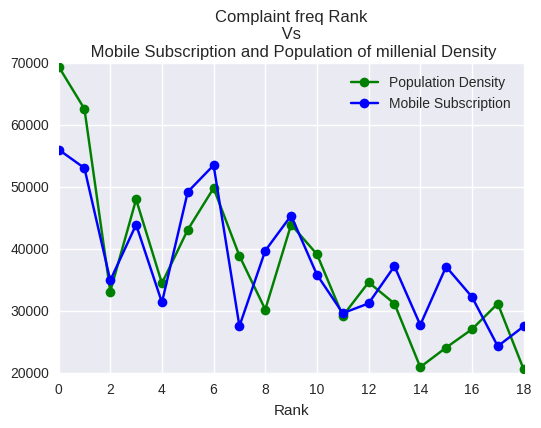

In [520]:
plt.plot(test['rank'], test['millenial'],'o-g', label="Population Density")
plt.plot(test['rank'], test['Hi_connect'],'o-b',label='Mobile Subscription')
plt.xlabel("Rank")
plt.title( "Complaint freq Rank\n Vs \n high connection and Population of millenial Density")
plt.legend(loc = 'best')
plt.show

As it is shown in the plot it seems that the freq of complaint is mostly among millenials and those who has access to high speed connection, also it shows that there is a correlation between the number of  millenials who complain and the access to high speed internet connection. 

In [521]:
Smf = smf.ols(formula='freq ~ Hi_connect', data=test)
Ols = Smf.fit()
print(Ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   freq   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     19.65
Date:                Wed, 16 Nov 2016   Prob (F-statistic):           0.000365
Time:                        22:00:00   Log-Likelihood:                -224.55
No. Observations:                  19   AIC:                             453.1
Df Residuals:                      17   BIC:                             455.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   5218.2083   3.26e+04      0.160      0.8

In [522]:
Smf = smf.ols(formula='freq ~ millenial', data=test)
Ols = Smf.fit()
print(Ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   freq   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     56.44
Date:                Wed, 16 Nov 2016   Prob (F-statistic):           8.50e-07
Time:                        22:00:28   Log-Likelihood:                -217.95
No. Observations:                  19   AIC:                             439.9
Df Residuals:                      17   BIC:                             441.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2.057e+04   1.75e+04      1.174      0.2

Conclusion
Based on the p-values of the coefficients of  population of millenial density, and internet access per Community District at $\alpha \leq 0.05$, we can say that Community Districts with a higher number of internet connected households submit more 311 complaints.

In [519]:
Smf = smf.ols(formula='freq ~ Hi_connect+ millenial', data=test)
Ols = Smf.fit()
print(Ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   freq   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     26.56
Date:                Wed, 16 Nov 2016   Prob (F-statistic):           8.24e-06
Time:                        21:57:46   Log-Likelihood:                -217.95
No. Observations:                  19   AIC:                             441.9
Df Residuals:                      16   BIC:                             444.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.987e+04    2.4e+04      0.828      0.4

# 5. Inform your results by linking datasets
Now you want to link the three data frames to produce summary statistics for Community Districts which show a high number of complaints vs. Community Districts which show a lower number of complaints. Please keep in mind that the identifiers used for the linkage (Community Dostrict IDs) should be recored the same way. Use regular expressions to harmonize the identifiers if possible. The identifiers should look like BK01, BK02, etc.
https://docs.python.org/2/library/re.html

In [ ]:
# Harmonize identifier of dataframe 1

In [ ]:
# Harmonize identifier of dataframe 2

In [ ]:
# Harmonize identifier of dataframe 3

In [ ]:
# Link the 3 dataframes

In [ ]:
# Are the demographics and infrastructure different in Community Districts that show more complaints than others?